**Load file**

---





In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline

BASE_DIR = os.path.join(os.getcwd(), '/content/drive/MyDrive/FEI/image')
CLASSES = os.listdir(BASE_DIR)
CLASS_TOTAL = len(CLASSES)
EPOCH = 40
BATCH_SIZE = 5
SIZE = (96, 96)
LEARNING_RATE = 0.00006
BRIGHTNESS = 1.1

print("CLASS TOTAL: ", CLASS_TOTAL)

CLASS TOTAL:  20


In [83]:
CLASSES

['john',
 'Caleb ',
 'Lawson',
 'Barnes',
 'Hughes',
 'Bennett',
 'William ',
 'Henry ',
 'Emma ',
 'Lucas ',
 'Sophia ',
 'Noah ',
 'Harper ',
 'Jackson ',
 'Ethan ',
 'Oliver',
 'Benjamin',
 'Maxine',
 'Stone',
 'Sullivan']

**PREPROCESSING**

In [84]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import ImageEnhance 
import numpy as np
import itertools


def preprocessing(path):
  img = load_img(path, target_size=SIZE, color_mode="grayscale")
  enhancer = ImageEnhance.Brightness(img)
  img = enhancer.enhance(BRIGHTNESS)
  img_array = img_to_array(img)
  img_array = np.dstack([img_array] * 3)
  return img_array

**SPLIT DATA**

In [85]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import random

X_train = []
X_val = []
X_test = []
Y_train = []
Y_val = []
Y_test = []

for index, className in enumerate(CLASSES):
  files = os.listdir(os.path.join(BASE_DIR, className))
  
  if len(files) >= 10:
    files = files[:100]
    train_x, test_x, train_y, test_y = train_test_split(files, 
                                                        [index] * len(files), 
                                                        test_size=10/100, 
                                                        random_state=42)
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, 
                                                      test_size=10/90, 
                                                      random_state=42)
  
    for filename in train_x:
      img_array = preprocessing(os.path.join(BASE_DIR, className, filename))
      X_train.append(img_array)
    
    for filename in val_x:
      img_array = preprocessing(os.path.join(BASE_DIR, className, filename))
      X_val.append(img_array)

    for filename in test_x:
      img_array = preprocessing(os.path.join(BASE_DIR, className, filename))
      X_test.append(img_array)

    Y_train.extend(train_y)
    Y_val.extend(val_y)
    Y_test.extend(test_y)

if X_train and Y_train:
    mapListTrain = list(zip(X_train, Y_train))
    random.shuffle(mapListTrain)
    X_train, Y_train = zip(*mapListTrain)
else:
    print("Error: Training data is empty")
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = to_categorical(np.array(Y_train))
Y_val = to_categorical(np.array(Y_val))
Y_test = to_categorical(np.array(Y_test))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(199, 96, 96, 3)
(40, 96, 96, 3)
(40, 96, 96, 3)
(199, 20)
(40, 20)
(40, 20)


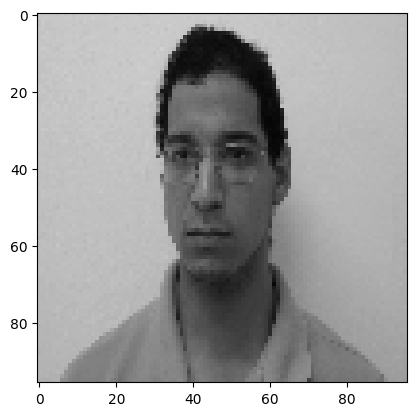

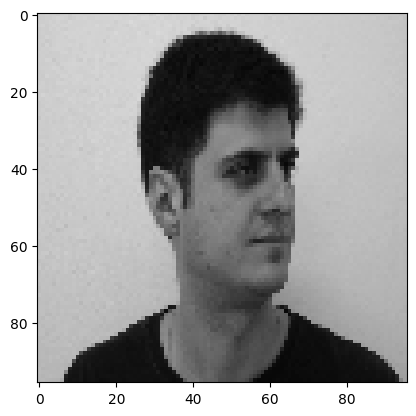

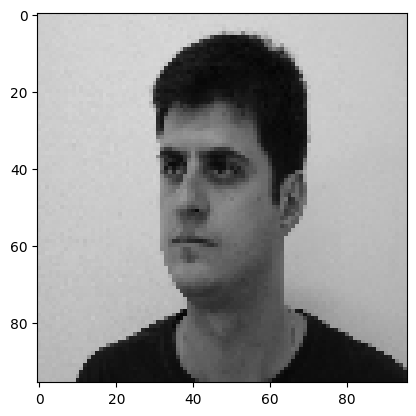

In [86]:
plt.imshow(X_train[0].astype(np.uint8))
plt.show()

plt.imshow(X_val[0].astype(np.uint8))
plt.show()

plt.imshow(X_test[0].astype(np.uint8))
plt.show()


**BUILD/TRAIN MODEL**

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session

def create_custom_model():
    clear_session()

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(CLASS_TOTAL, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=LEARNING_RATE), metrics=['accuracy'])
    return model



clear_session()

# Preprocessing and data augmentation


model = create_custom_model()
history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_val, Y_val))


Epoch 1/40
7/7 [==============================] - 7s 788ms/step - loss: 70.1510 - accuracy: 0.0804 - val_loss: 4.2373 - val_accuracy: 0.0500
Epoch 2/40
7/7 [==============================] - 10s 1s/step - loss: 3.1370 - accuracy: 0.1307 - val_loss: 2.0326 - val_accuracy: 0.5000
Epoch 3/40
7/7 [==============================] - 5s 650ms/step - loss: 1.5100 - accuracy: 0.5729 - val_loss: 1.1590 - val_accuracy: 0.7250
Epoch 4/40
7/7 [==============================] - 6s 930ms/step - loss: 0.7661 - accuracy: 0.7990 - val_loss: 0.8737 - val_accuracy: 0.8250
Epoch 5/40
7/7 [==============================] - 4s 578ms/step - loss: 0.4600 - accuracy: 0.8442 - val_loss: 0.7887 - val_accuracy: 0.8500
Epoch 6/40
7/7 [==============================] - 4s 566ms/step - loss: 0.4077 - accuracy: 0.8744 - val_loss: 0.9612 - val_accuracy: 0.7750
Epoch 7/40
7/7 [==============================] - 6s 892ms/step - loss: 0.2263 - accuracy: 0.9296 - val_loss: 0.9345 - val_accuracy: 0.8500
Epoch 8/40
7/7 [=====

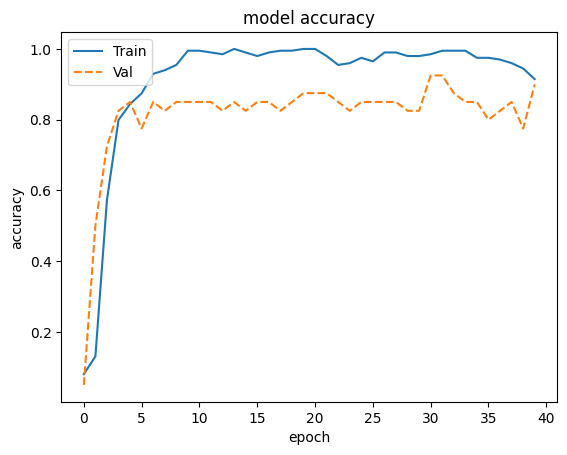

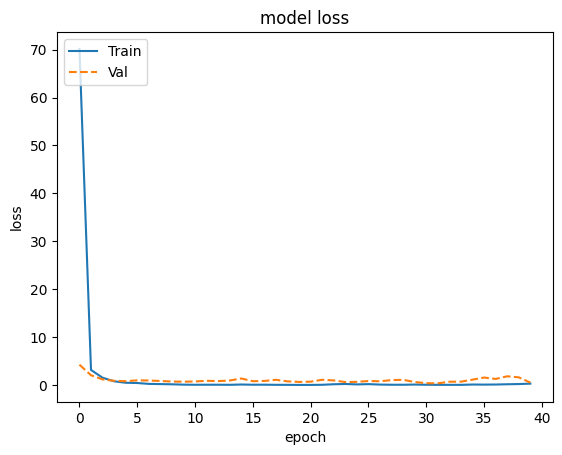

In [88]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], ls="--")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], ls="--")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [89]:
loss, accuracy = model.evaluate(X_test, Y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 74ms/step - loss: 0.3356 - accuracy: 0.9250
Test Loss: 0.33559590578079224
Test Accuracy: 0.925000011920929


**TESTING THE MODEL**

In [90]:
model.save('cnn_model.h5')

In [91]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('cnn_model.h5')

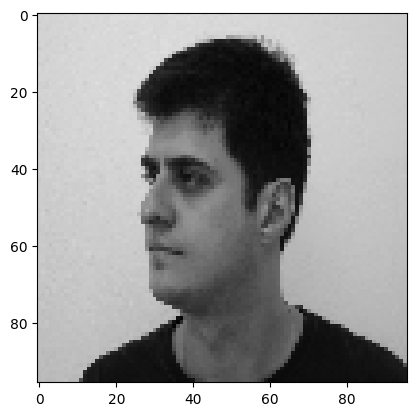

1/1 [==============================] - 0s 32ms/step
Predicted class: john
Predicted probabilities: [9.9920219e-01 1.5709993e-09 2.3112156e-07 6.2994472e-13 5.0062499e-10
 2.0522136e-11 4.2661913e-10 7.7166824e-06 4.7989852e-11 1.0972894e-08
 4.2007636e-10 7.5864858e-07 7.8765838e-04 3.6846842e-08 1.3401682e-06
 4.6394247e-12 1.1141141e-12 4.6297254e-13 1.0710450e-08 2.2683895e-11]


In [94]:
path = '/content/drive/MyDrive/FEI/image/john/1-02.jpg'
img=preprocessing(path)

plt.imshow(img.astype(np.uint8))
plt.show()

img = np.expand_dims(img, axis=0)  

predictions = model.predict(img)

predicted_class = CLASSES[np.argmax(predictions)]

predicted_probabilities = predictions[0]

print("Predicted class:", predicted_class)
print("Predicted probabilities:", predicted_probabilities)